In [ ]:
ENV["JULIA_DEPOT_PATH"] = ENV["PWD"] * "/julia_pkg"

"/notebooks/julia_pkg"

In [ ]:
ENV["JULIA_DEPOT_PATH"]

"/notebooks/julia_pkg"

In [ ]:
using Agents, Random, Distributions, InteractiveDynamics;
using OpenStreetMapXPlot
using Plots
gr()

LoadError: ArgumentError: Package Agents not found in current path:
- Run `import Pkg; Pkg.add("Agents")` to install the Agents package.


In [ ]:
@agent Transportor OSMAgent begin
    capacitate_m3::Float16
    capacitate_consumata_m3::Float16
    prob_livrare_corecta::Float16
    timpi_transfer_pachet_s::Vector{Float16}
end

LoadError: LoadError: UndefVarError: @agent not defined
in expression starting at In[3]:1

In [ ]:
@agent Depozitar OSMAgent begin
    capacitate_m3::Float16
    capacitate_consumata_m3::Float16
    prob_livrare_corecta::Float16
    timpi_transfer_pachet_s::Vector{Float16}
end

LoadError: LoadError: UndefVarError: @agent not defined
in expression starting at In[4]:1

In [ ]:
@agent Colet OSMAgent begin
    volum_m3::Float16
    valoare_ron::Float16
end

LoadError: LoadError: UndefVarError: @agent not defined
in expression starting at In[4]:1

In [ ]:
function initialise(; map_path = "map.osm")
    model = ABM(Union{Transportor, Depozitar, Colet}, OpenStreetMapSpace(map_path))
    d_prob_livrare_corecta = truncated(Normal(.8, 2), .4, 1.)
    d_timpi_transfer = truncated(Exponential(60), 5, 60*15)
    puncte_pornire = Vector{Tuple{Int,Int,Float64}}()
    for id in 1:10
        adresa = random_position(model)
        append!(puncte_pornire, adresa)
        ruta = OSM.plan_route(adresa, adresa, model)
        capacitate = rand(d_capacitate)
        prob_livrare = rand(d_prob_livrare_corecta)
        timp_transfer = rand(d_timpi_transfer, 1)
        depozitar = Depozitar(id, adresa, ruta, adresa, capacitate, 0., prob_livrare, timp_transfer)
        add_agent_pos!(depozitar, model)
        println(id)
    end
    # Transportori
    d_capacitate = truncated(Normal(5, 2), 1, 20)
    for id in 11:30
        inceput = random_position(model)
        sfarsit = random_position(model)
        ruta = OSM.plan_route(inceput, sfarsit, model)
        capacitate = rand(d_capacitate)
        prob_livrare = rand(d_prob_livrare_corecta)
        timp_transfer = rand(d_timpi_transfer, 1)
        transportor = Transportor(id, inceput, ruta, sfarsit, capacitate, 0., prob_livrare, timp_transfer)
        add_agent_pos!(transportor, model)
    end
    # Colete
    for id in 100:200
        
    return model
end

initialise (generic function with 1 method)

In [ ]:
m = initialise()

1
2
3
4
5
6
7
8
9
10


┌ Warning: AgentType is not concrete. If your agent is parametrically typed, you're probably seeing this warning because you gave `Agent` instead of `Agent{Float64}` (for example) to this function. You can also create an instance of your agent and pass it to this function. If you want to use `Union` types for mixed agent models, you can silence this warning.
└ @ Agents /opt/julia/packages/Agents/HGute/src/core/model.jl:297


AgentBasedModel with 30 agents of type Union{Depozitar, Transportor}
 space: OpenStreetMapSpace with 484 roadways and 775 intersections
 scheduler: fastest

In [ ]:
a = m[1]

Depozitar(1, (367, 367, 0.0), Int64[], (367, 367, 0.0), Float16(4.684), Float16(0.0), Float16(0.4255), Float16[52.5])

In [ ]:
a.

Depozitar(1, (367, 367, 0.0), Int64[], (367, 367, 0.0), Float16(4.684), Float16(0.0), Float16(0.4255), Float16[52.5])

In [ ]:
function plotagents(model)
    ids = model.scheduler(model)
    markers = :circle
    pos = [OSM.map_coordinates(model[i], model) for i in ids]

    scatter!(
        pos;
        markershapes = markers,
        label = "",
        markerstrokewidth = 0.5,
        markerstrokecolor = :black,
        markeralpha = 0.7,
    )
end

plotagents (generic function with 1 method)

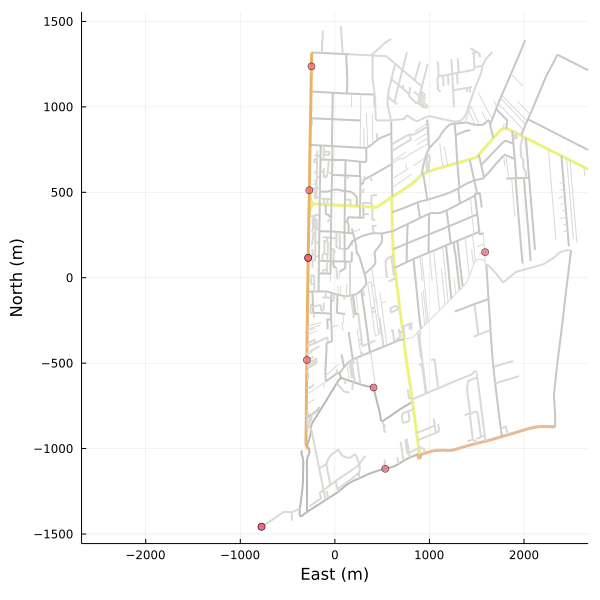

In [ ]:
plotmap(m.space.m)
plotagents(m)